<a href="https://colab.research.google.com/github/nafilarafeeq/machine-learning-1/blob/main/machine_learning1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Tell me about this dataset.

Here is all the data you need:
"house_price.csv"

## Data loading

### Subtask:
Load the house price dataset.


**Reasoning**:
I need to import pandas and load the dataset into a DataFrame, then display the first 5 rows.



In [ ]:
import pandas as pd

try:
    df_house_price = pd.read_csv('house_price.csv')
    display(df_house_price.head())
except FileNotFoundError:
    print("Error: 'house_price.csv' not found. Please ensure the file is in the correct location.")
    df_house_price = None
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file. Please check the file format.")
    df_house_price = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df_house_price = None

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


## Data exploration

### Subtask:
Explore the loaded house price dataset to understand its basic characteristics.


**Reasoning**:
Explore the basic characteristics of the house price dataset as instructed, including dimensions, data types, descriptive statistics, missing values, and unique values in categorical columns.



In [ ]:
# Check dimensions
print("Shape of the DataFrame:", df_house_price.shape)

# Examine data types
print("\nData Types:\n", df_house_price.dtypes)

# Descriptive statistics for numerical features
print("\nDescriptive Statistics:\n", df_house_price.describe())

# Check for missing values
print("\nMissing Values:\n", df_house_price.isnull().sum())

# Explore unique values in categorical columns
categorical_cols = ['location', 'size']  # Assuming these are categorical
for col in categorical_cols:
    print(f"\nUnique values in '{col}':\n{df_house_price[col].value_counts()}")

Shape of the DataFrame: (13200, 7)

Data Types:
 location           object
size               object
total_sqft        float64
bath              float64
price             float64
bhk                 int64
price_per_sqft      int64
dtype: object

Descriptive Statistics:
          total_sqft          bath         price           bhk  price_per_sqft
count  13200.000000  13200.000000  13200.000000  13200.000000    1.320000e+04
mean    1555.302783      2.691136    112.276178      2.800833    7.920337e+03
std     1237.323445      1.338915    149.175995      1.292843    1.067272e+05
min        1.000000      1.000000      8.000000      1.000000    2.670000e+02
25%     1100.000000      2.000000     50.000000      2.000000    4.267000e+03
50%     1275.000000      2.000000     71.850000      3.000000    5.438000e+03
75%     1672.000000      3.000000    120.000000      3.000000    7.317000e+03
max    52272.000000     40.000000   3600.000000     43.000000    1.200000e+07

Missing Values:
 location 

## Data analysis

### Subtask:
Perform more in-depth data analysis on the house price dataset, focusing on identifying potential relationships between variables and outliers.


**Reasoning**:
Calculate the correlation matrix, visualize it as a heatmap, and then detect outliers using box plots for selected numerical features.



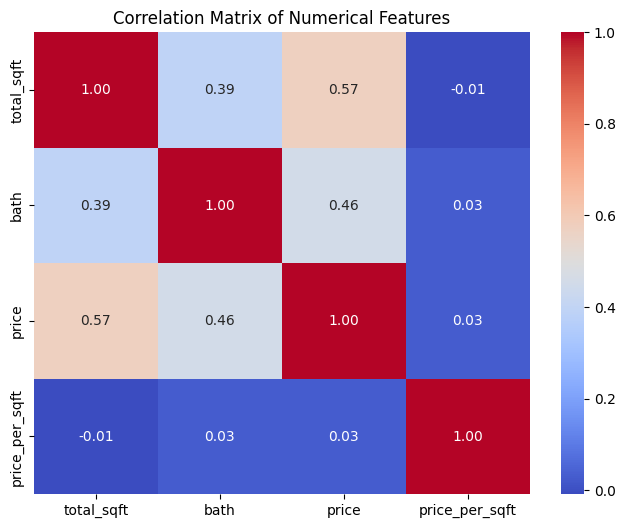

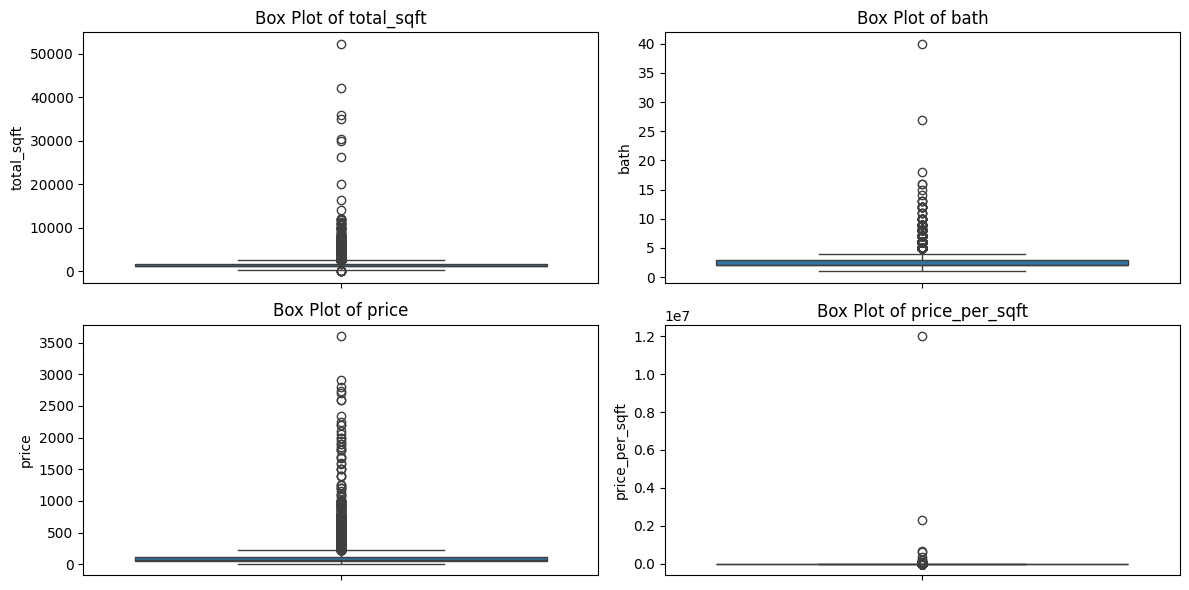

Locations with low frequency counts:
 Series([], Name: count, dtype: int64)

Sizes with low frequency counts:
 size
9 BHK         7
8 BHK         5
11 BHK        2
10 BHK        2
11 Bedroom    2
27 BHK        1
19 BHK        1
43 Bedroom    1
16 BHK        1
14 BHK        1
12 Bedroom    1
13 BHK        1
18 Bedroom    1
Name: count, dtype: int64


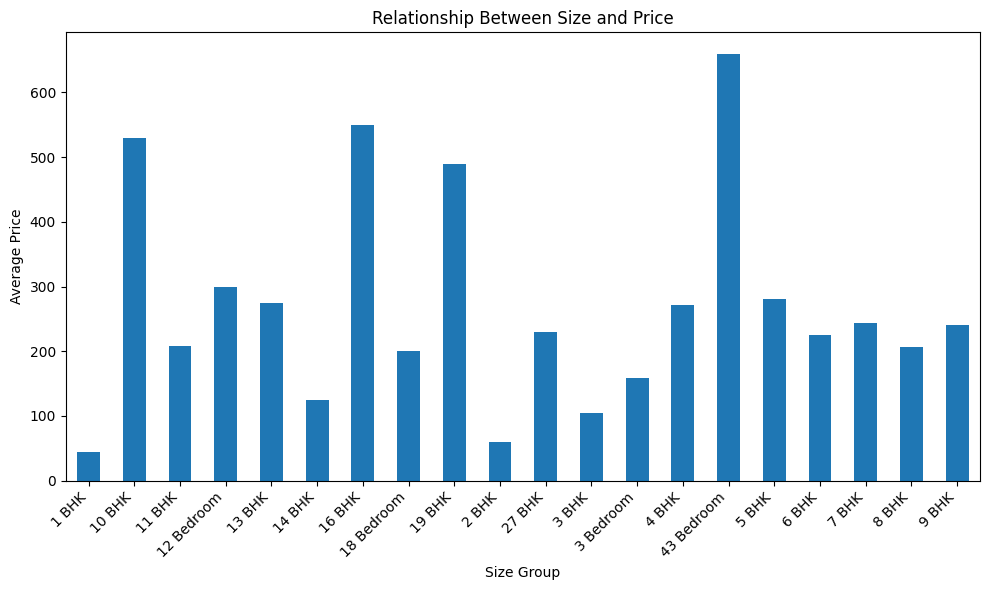

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation Analysis
numerical_features = ['total_sqft', 'bath', 'price', 'price_per_sqft']
correlation_matrix = df_house_price[numerical_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Outlier Detection (Numerical Features)
plt.figure(figsize=(12, 6))
features_to_plot = ['total_sqft', 'bath', 'price', 'price_per_sqft']
for i, feature in enumerate(features_to_plot):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=df_house_price[feature])
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()

# Outlier Detection (Categorical Features) - Location
location_counts = df_house_price['location'].value_counts()
print("Locations with low frequency counts:\n", location_counts[location_counts < 10])

# Outlier Detection (Categorical Features) - Size
size_counts = df_house_price['size'].value_counts()
print("\nSizes with low frequency counts:\n", size_counts[size_counts < 10])

# Relationship between 'size' and 'price'
# Group similar sizes
size_mapping = {
    '1 RK': '1 BHK',
    '1 Bedroom': '1 BHK',
    '2 Bedroom': '2 BHK',
    '3 BHK': '3 BHK',
    '4 Bedroom': '4 BHK',
    '4 BHK': '4 BHK',
    '5 Bedroom': '5 BHK',
    '6 Bedroom': '6 BHK',
    '7 Bedroom': '7 BHK',
    '8 Bedroom': '8 BHK',
    '9 Bedroom': '9 BHK',
    '10 Bedroom': '10 BHK',
    '11 BHK': '11 BHK',
    '11 Bedroom': '11 BHK',
    '19 BHK': '19 BHK'
}

df_house_price['size_grouped'] = df_house_price['size'].replace(size_mapping)
size_price_relationship = df_house_price.groupby('size_grouped')['price'].mean()
plt.figure(figsize=(10, 6))
size_price_relationship.plot(kind='bar')
plt.xlabel('Size Group')
plt.ylabel('Average Price')
plt.title('Relationship Between Size and Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Data visualization

### Subtask:
Visualize the distributions of numerical features and potential correlations between them in the house price dataset.


**Reasoning**:
Visualize the distributions of numerical features and potential correlations between them using histograms and scatter plots, and create a box plot for 'price' grouped by 'size_grouped'.



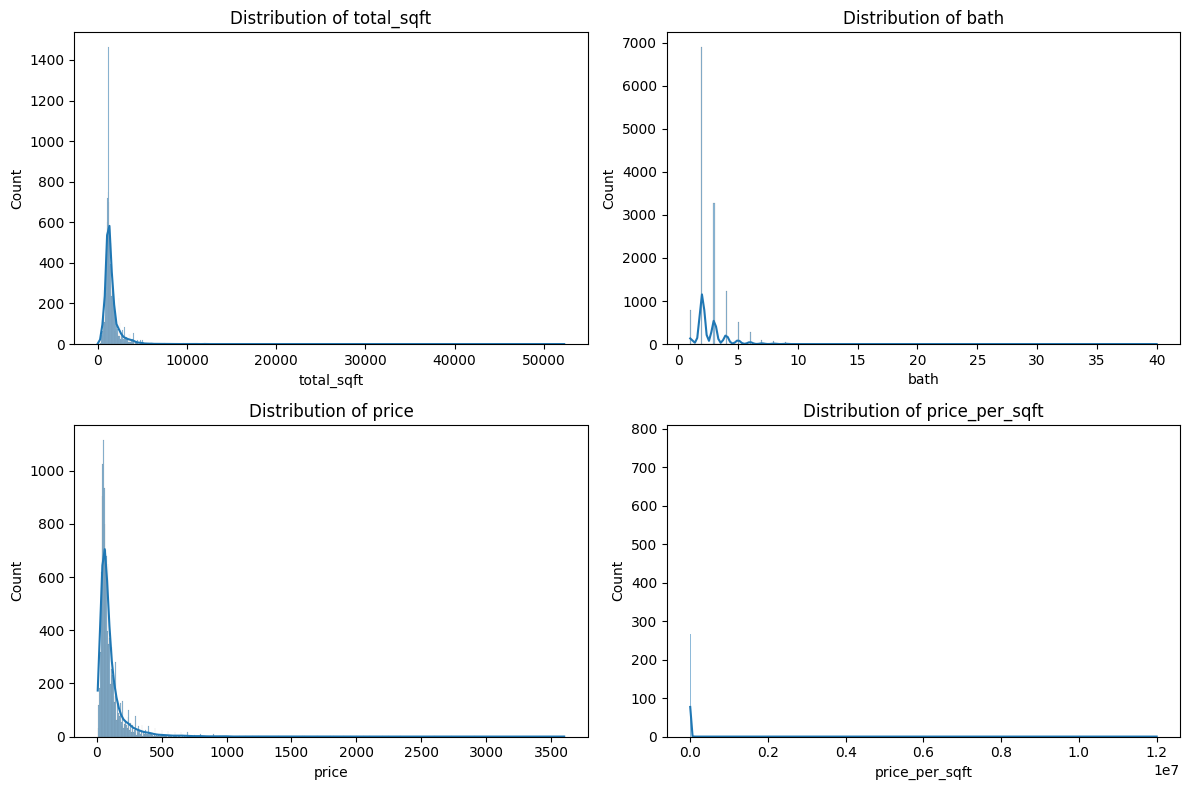

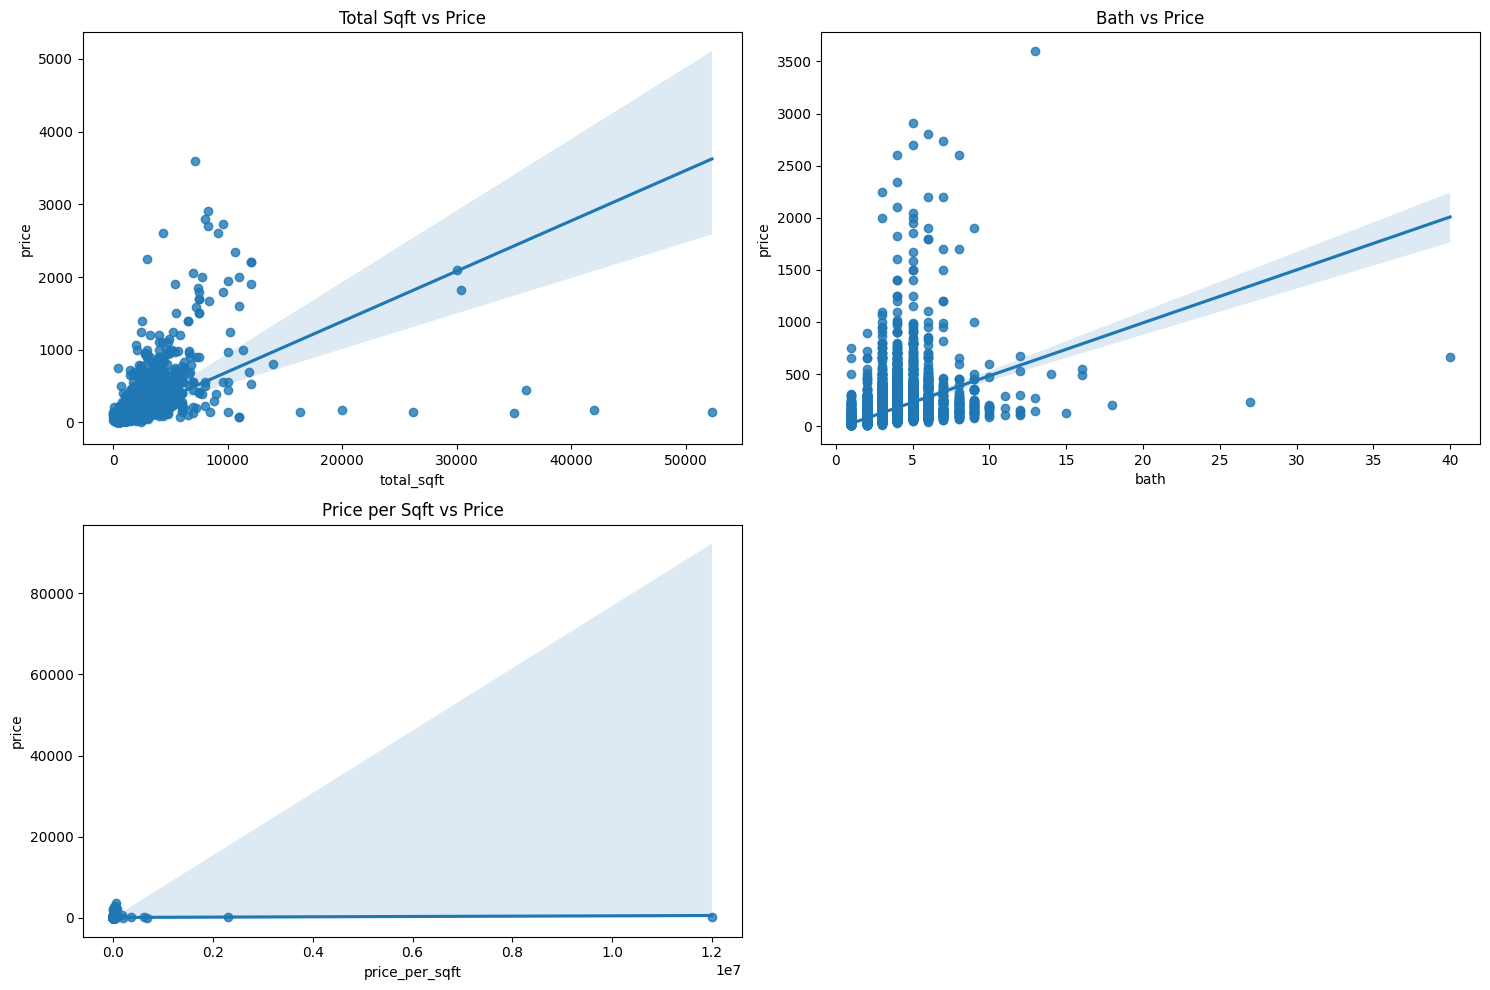

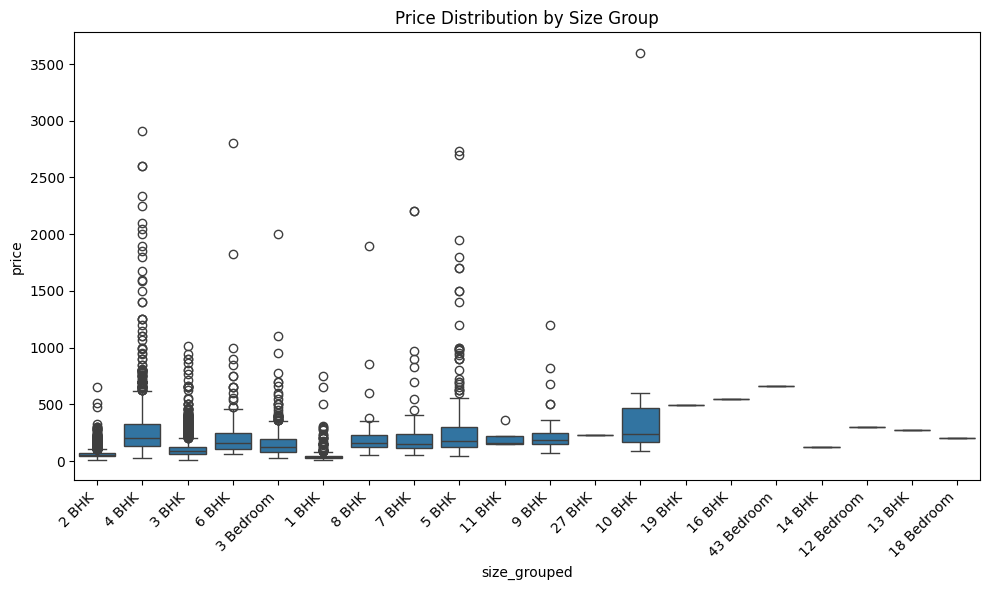

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical features
plt.figure(figsize=(12, 8))
numerical_features = ['total_sqft', 'bath', 'price', 'price_per_sqft']
for i, col in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df_house_price[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Scatter plots for pairs of numerical features
plt.figure(figsize=(15, 10))
plt.subplot(2,2,1)
sns.regplot(x='total_sqft', y='price', data=df_house_price)
plt.title('Total Sqft vs Price')

plt.subplot(2,2,2)
sns.regplot(x='bath', y='price', data=df_house_price)
plt.title('Bath vs Price')

plt.subplot(2,2,3)
sns.regplot(x='price_per_sqft', y='price', data=df_house_price)
plt.title('Price per Sqft vs Price')
plt.tight_layout()
plt.show()


# Box plot for 'price' grouped by 'size_grouped'
plt.figure(figsize=(10, 6))
sns.boxplot(x='size_grouped', y='price', data=df_house_price)
plt.title('Price Distribution by Size Group')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Summary:

### 1. Q&A

No questions were posed in the provided data analysis task.


### 2. Data Analysis Key Findings

* **Data Dimensions:** The dataset comprises 13,200 rows and 7 columns.
* **Potential Outliers:**  The `total_sqft`, `bath`, and `price` columns exhibit potential outliers, indicated by unusually large maximum values compared to other percentiles in the descriptive statistics and box plots.  Specifically, `total_sqft` has a maximum of 52272.
* **High Cardinality:** The 'location' column has a high cardinality (241 unique values), which may require feature engineering (e.g. grouping locations).
* **Low-Frequency Categories:** Several 'size' categories have low frequency counts (less than 10 occurrences), potentially indicating noise or outliers. Examples include '9 BHK', '8 BHK', '11 BHK'.  No locations have a frequency less than 10.
* **'Size' and 'Price' Relationship:**  After grouping similar size categories, the analysis reveals a potential relationship between the grouped size and average price, visualized using a bar plot.  The exact nature of this relationship needs to be observed in the plot.
* **Correlation Analysis:** Correlation coefficients between numerical features ('total_sqft', 'bath', 'price', and 'price_per_sqft') were calculated and visualized in a heatmap.


### 3. Insights or Next Steps

* **Outlier Treatment:** Investigate and address potential outliers in 'total_sqft', 'bath', and 'price' using appropriate methods (e.g., winsorization, IQR-based removal) before further modeling.
* **Feature Engineering:** Group low-frequency 'size' categories and explore different ways to handle the high-cardinality 'location' column (e.g., grouping, one-hot encoding, target encoding).
